# Multiple threshold models

biological dynamics with depensatory behavior

$D(B_t) = 1- exp\left(\frac{log(0.5)B_t}{dK}\right)$

$B_{t+1} = \frac{r D(B_t)B_t}{1+bD(B_t)B_t} - Q(B_t)E(B_t)u_t$

$E(B) =   \frac{E_{max}}{(1 + exp( - Q(B_t) + V))}$

intercept: $= E_0 = E(0) =  \frac{Emax}{1+exp(V)}$

steepness: $= \gamma = \frac{dE(B)}{dB} = \frac{a}{4}$

$Q(B) = qB^{\rho}$

catchability: $= q$

nonlinearity: $= \rho $

In [235]:
mutable struct fishery_with_thresholds
    d::Float64 # strength of dependation
    K::Float64 # carrying capacity (r-1)/b
    r::Float64 # growth rate 
    b::Float64 # density dependence
    q::Float64 # catchability
    rho::Float64 # nonlinear catchability 
    V::Float64 # base value
    a::Float64 # steepness
    Emax::Float64 # max effort 
    intercept::Float64 # Emax/(1+exp(V))
    steepness::Float64 # a/4
end 

function fishery_with_thresholds(d,r,K,q,rho,Emax,intercept,steepness)
    V = log(Emax/intercept-1)
    b = (r-1)/K
    a = 4*steepness
    return fishery_with_thresholds(d,K,r,b,q,rho,V,a,Emax,intercept,steepness)
end 

function depensation(fishery::fishery_with_thresholds, x::Float64)
    return 1-exp((log(0.5)*x)/(fishery.d*fishery.K))
end 

function growth(fishery::fishery_with_thresholds, x::Float64)
    X = x*depensation(fishery, x)
    return fishery.r*X/(1+fishery.b*X)
end 

function catchability(fishery::fishery_with_thresholds, x::Float64)
    return fishery.q*x^fishery.rho
end 

function effort(fishery::fishery_with_thresholds, x::Float64)
    return fishery.Emax/(1+exp(-fishery.a*catchability(fishery,x)+fishery.V))
end 

function _catch(fishery::fishery_with_thresholds, x::Float64, u::Float64)
    return effort(fishery,x)*catchability(fishery,x)
end 

_catch (generic function with 2 methods)

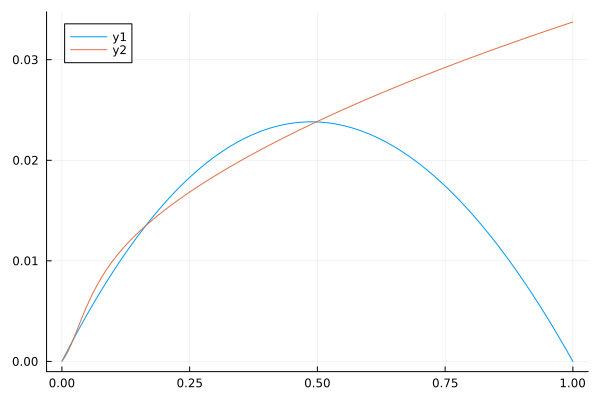

In [271]:
d = 0.0 
K = 1.0
r = 1.1
q = 1.125
rho = 0.5
Emax = 0.03
intercept = 0.05*Emax
steepness = 4.0
fishery = fishery_with_thresholds(d,r,K,q,rho,Emax,intercept,steepness)
#plot
using Plots
x = 0.0:0.0005:1.0
Plots.plot(x, broadcast(x -> growth(fishery,x) - x,x))
Plots.plot!(x, broadcast(x -> _catch(fishery,x,1.0),x))

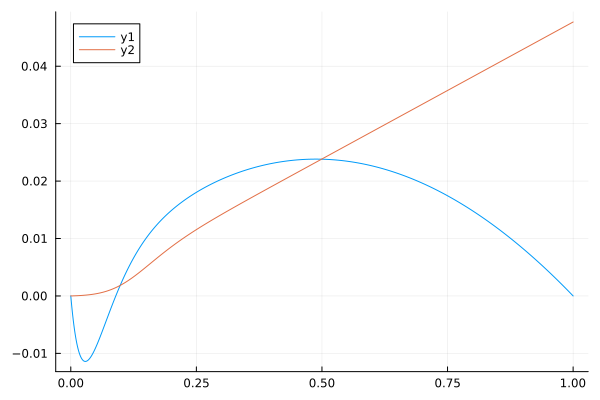

In [277]:
d = 0.025
K = 1.0
r = 1.1
q = 1.59
rho = 1.0
Emax = 0.03
intercept = 0.05*Emax
steepness = 4.0
fishery = fishery_with_thresholds(d,r,K,q,rho,Emax,intercept,steepness)

using Plots
x = 0.0:0.001:1.0
Plots.plot(x, broadcast(x -> growth(fishery,x)-x,x))
Plots.plot!(x, broadcast(x -> _catch(fishery,x,1.0),x))

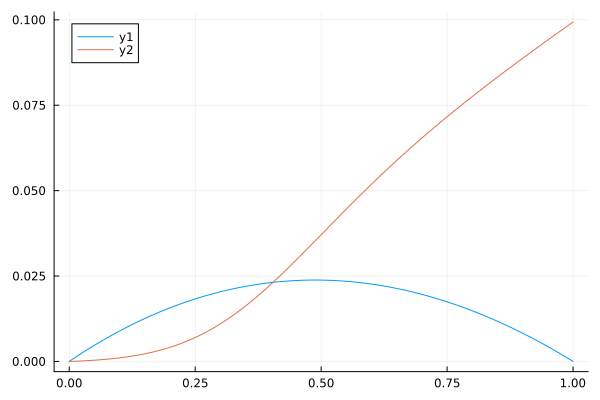

In [292]:
d = 0.0 
K = 1.0
r = 1.1
q = 1.0
rho = 1.0
Emax = 0.1
intercept = 0.05*Emax
steepness = 2.0
fishery = fishery_with_thresholds(d,r,K,q,rho,Emax,intercept,steepness)
#plot
using Plots
x = 0.0:0.0005:1.0
Plots.plot(x, broadcast(x -> growth(fishery,x) - x,x))
Plots.plot!(x, broadcast(x -> _catch(fishery,x,1.0),x))